In [6]:
using Gtk, Gtk.ShortNames

win = Window("Count Click")
v = Box(:v)
l = Label("You clicked 0 times.")
b = Button("Click!")
push!(win, v)
push!(v, l)
push!(v, b)
set_gtk_property!(v, :expand, l, true)

showall(win)


niter = 0
function click()
    global niter += 1
    set_gtk_property!(l, :label, "You clicked $niter times.")
    return nothing
end

signal_connect(x -> click(), b, "clicked")


if !isinteractive()
    c = Condition()
    signal_connect(win, :destroy) do widget
        notify(c)
    end
    wait(c)
end


In [71]:
using Gtk, Graphics
c = @GtkCanvas()
win = GtkWindow(c, "Canvas")
@guarded draw(c) do widget
    ctx = getgc(c)
    h = height(c)
    w = width(c)
    # rectangle du haut rouge
    rectangle(ctx, 30, 50, w-50, 2)
    set_source_rgb(ctx, 1, 0, 0)
    fill(ctx)
    #Trou
    circle(ctx, 50, 20, 4pi)
    set_source_rgb(ctx, 0, 0, 0)
    fill(ctx)
    #Balle
    circle(ctx, h-30, w-30, 3pi)
    set_source_rgb(ctx, 1, 0, 0)
    fill(ctx)
   
    
  
    
        c.mouse.button1press = @guarded (widget, event) -> begin
        ctx = getgc(widget)
        set_source_rgb(ctx, 0, 1, 0)
        arc(ctx, event.x, event.y, 20, 0, 2pi)
        stroke(ctx)
        reveal(widget)
        end
end
show(c)

GtkCanvas(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=GDK_POINTER_MOTION_MASK | GDK_POINTER_MOTION_HINT_MASK | GDK_BUTTON_PRESS_MASK | GDK_BUTTON_RELEASE_MASK | GDK_SCROLL_MASK, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=2)

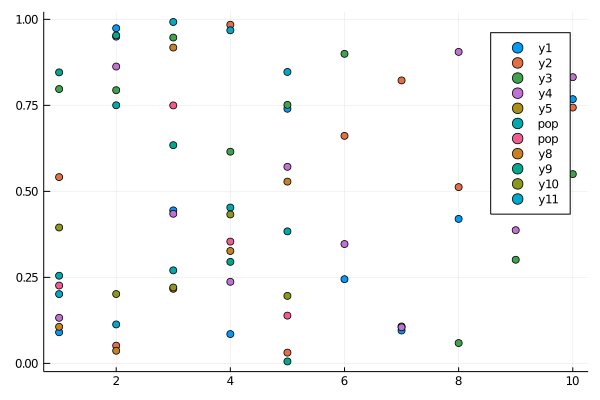

In [70]:
using Plots
x = 1:5; y = rand(5, 2)
scatter!(x,y)